<a href="https://colab.research.google.com/github/Sunny18-2002/IIITH-files/blob/main/Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

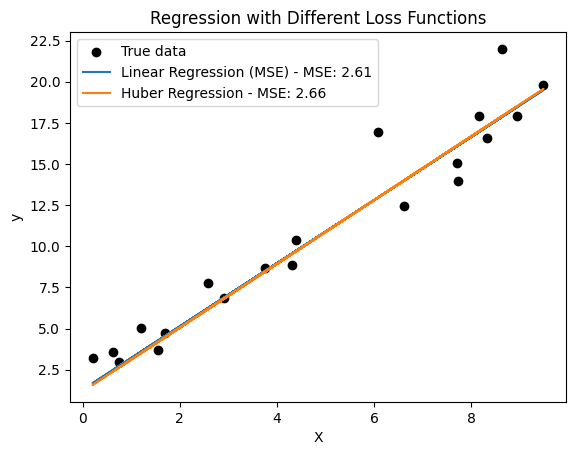

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # True relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression with Mean Squared Error
model_mse = LinearRegression()
model_mse.fit(X_train_scaled, y_train)
predictions_mse = model_mse.predict(X_test_scaled)

# Huber Regression with Huber Loss
model_huber = HuberRegressor()
model_huber.fit(X_train_scaled, y_train)
predictions_huber = model_huber.predict(X_test_scaled)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='True data')
plt.plot(X_test, predictions_mse, label=f'Linear Regression (MSE) - MSE: {mean_squared_error(y_test, predictions_mse):.2f}')
plt.plot(X_test, predictions_huber, label=f'Huber Regression - MSE: {mean_squared_error(y_test, predictions_huber):.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with Different Loss Functions')
plt.show()


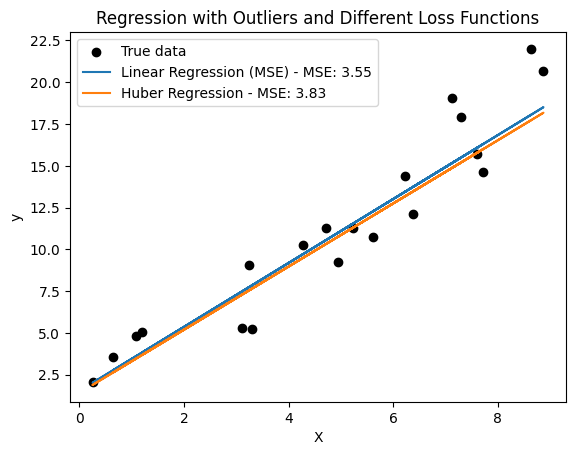

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate synthetic data with outliers
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # True relationship with noise
y[20] += 20  # Introduce an outlier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Linear Regression with Mean Squared Error
model_mse = LinearRegression()
model_mse.fit(X_train_scaled, y_train)
predictions_mse = model_mse.predict(X_test_scaled)

# Fit Huber Regression with Huber Loss
model_huber = HuberRegressor()
model_huber.fit(X_train_scaled, y_train)
predictions_huber = model_huber.predict(X_test_scaled)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='True data')
plt.plot(X_test, predictions_mse, label=f'Linear Regression (MSE) - MSE: {mean_squared_error(y_test, predictions_mse):.2f}')
plt.plot(X_test, predictions_huber, label=f'Huber Regression - MSE: {mean_squared_error(y_test, predictions_huber):.2f}')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression with Outliers and Different Loss Functions')
plt.show()


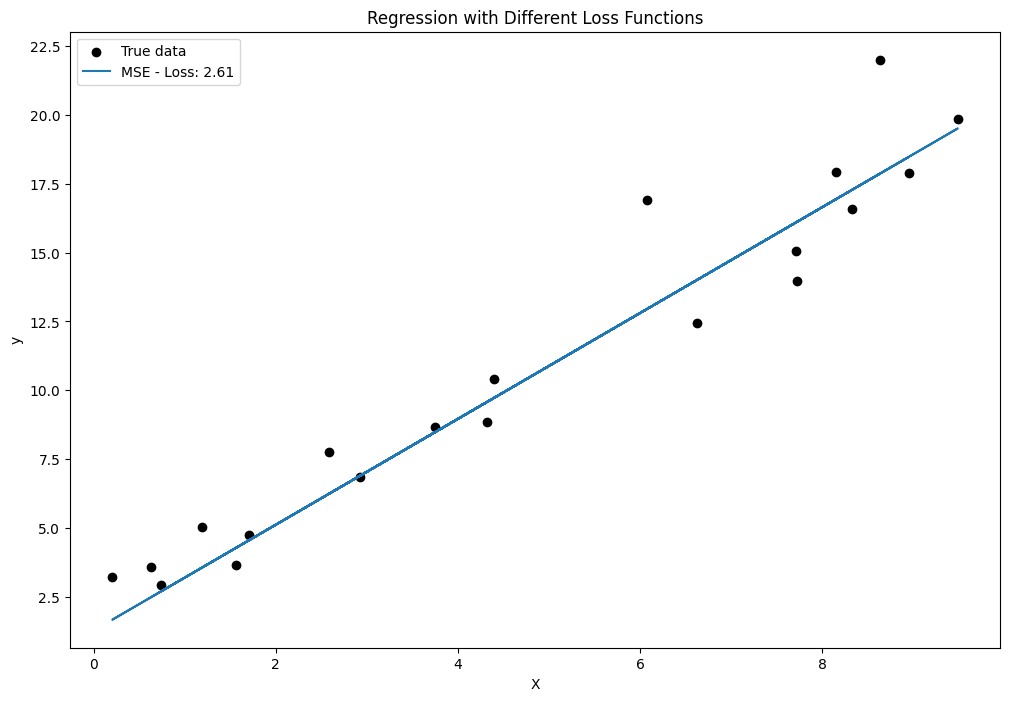

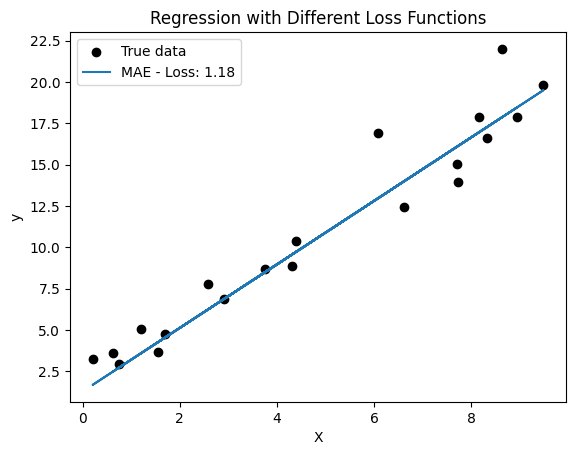

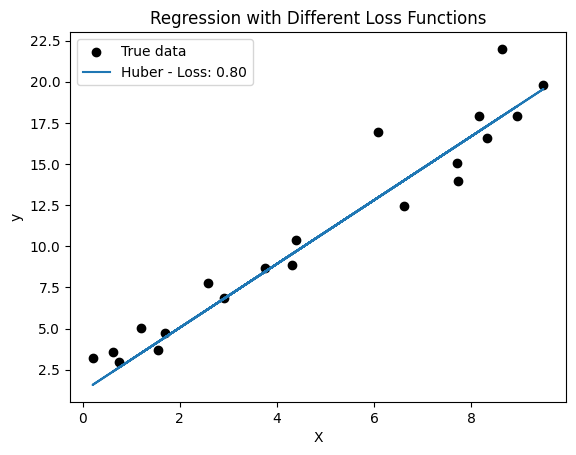

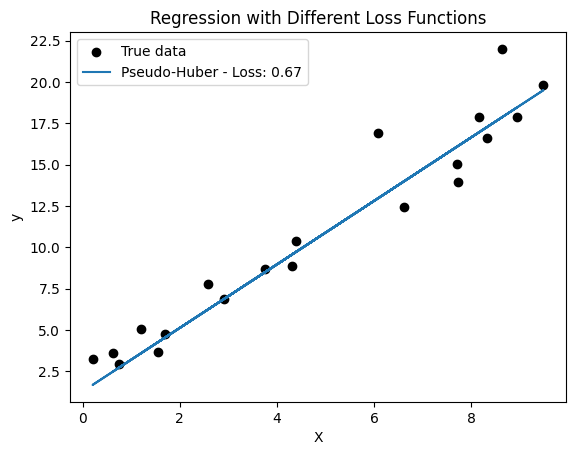

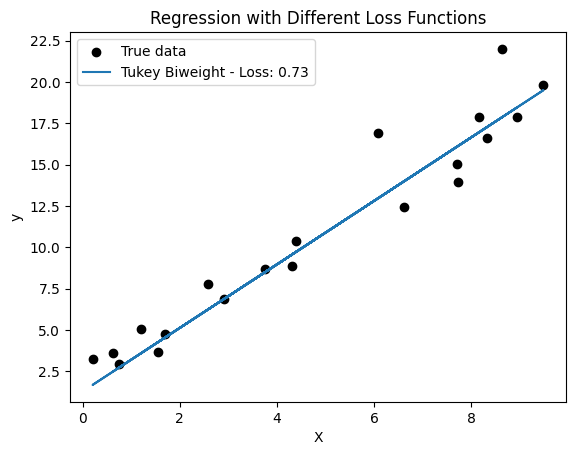

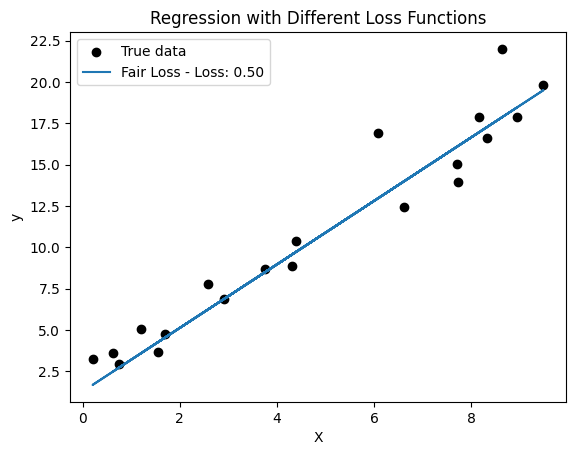

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2  # True relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define additional loss functions
def huber_loss(error, delta=1.0):
    return np.where(np.abs(error) < delta, 0.5 * error ** 2, delta * (np.abs(error) - 0.5 * delta))

def pseudo_huber_loss(error, delta=1.0):
    return delta ** 2 * (np.sqrt(1 + (error / delta) ** 2) - 1)

def tukey_biweight_loss(error, delta=1.0):
    c = delta ** 2
    return np.where(np.abs(error) <= delta, c * (1 - (1 - (error / delta) ** 2) ** 3), c)

def fair_loss(error, delta=1.0):
    return delta * (np.abs(error) - delta * np.log(1 + np.abs(error) / delta))

# Loss functions
loss_functions = {
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'Huber': lambda y_true, y_pred: np.mean(huber_loss(y_true - y_pred)),
    'Pseudo-Huber': lambda y_true, y_pred: np.mean(pseudo_huber_loss(y_true - y_pred)),
    'Tukey Biweight': lambda y_true, y_pred: np.mean(tukey_biweight_loss(y_true - y_pred)),
    'Fair Loss': lambda y_true, y_pred: np.mean(fair_loss(y_true - y_pred)),
}

# Train models and visualize results
plt.figure(figsize=(12, 8))
for loss_name, loss_function in loss_functions.items():
    # Linear Regression with different loss functions
    if loss_name == 'Huber':
        model = HuberRegressor()
    else:
        model = LinearRegression()

    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    # Plotting
    plt.scatter(X_test, y_test, color='black', label='True data')
    plt.plot(X_test, predictions, label=f'{loss_name} - Loss: {loss_function(y_test, predictions):.2f}')
    plt.title('Regression with Different Loss Functions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


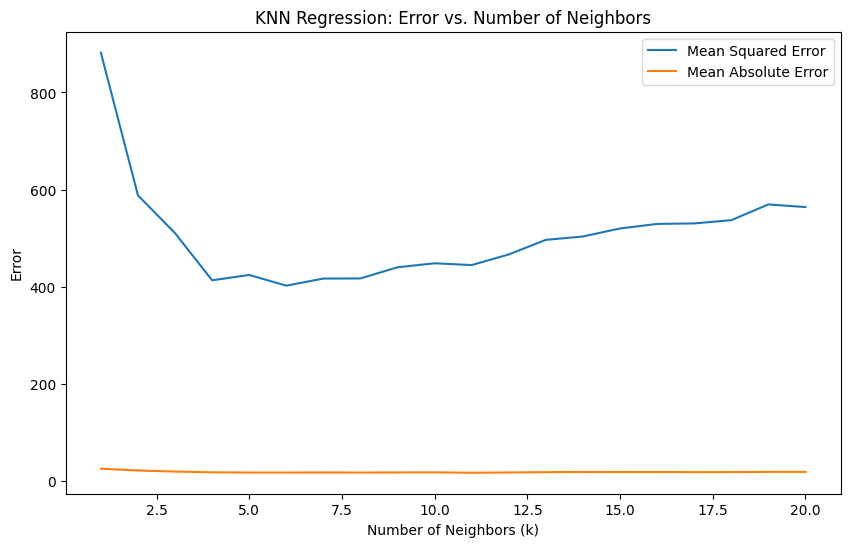

Optimal k value based on MSE: 6


In [5]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = range(1, 21)

# Initialize lists to store evaluation results
mse_results = []
mae_results = []

# Perform grid search over k values
for k in k_values:
    # Train KNN regressor
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_results.append(mse)
    mae_results.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, label='Mean Squared Error')
plt.plot(k_values, mae_results, label='Mean Absolute Error')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('KNN Regression: Error vs. Number of Neighbors')
plt.legend()
plt.show()

# Find the optimal k value based on the minimum MSE
optimal_k = k_values[np.argmin(mse_results)]
print(f'Optimal k value based on MSE: {optimal_k}')
